In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import seaborn as sns
from datetime import timedelta
from matplotlib.patches import Patch

In [22]:
# Lade die Ergebnisse des Genetic Matchings
df = pd.read_csv("../tests/matching_ergebnis.csv")
print(df.head())

                         teilaufgabe_id                teilaufgabe  \
0  2e2055a3-33f3-4451-b94e-8effc05c681e      Entwurf CAD-Baugruppe   
1  2e2055a3-33f3-4451-b94e-8effc05c681e      Entwurf CAD-Baugruppe   
2  b217295a-9c66-4665-846c-ca6a6965ecb6    Simulation FEM-Struktur   
3  b217295a-9c66-4665-846c-ca6a6965ecb6    Simulation FEM-Struktur   
4  4debe244-8b4d-4e2b-a0e8-8d9958e4df1b  Signalverarbeitung Sensor   

                             projekt_id           kompetenz  \
0  cc1dfefd-b91a-4155-bb52-7f15f701af9f                 CAD   
1  cc1dfefd-b91a-4155-bb52-7f15f701af9f                 CAD   
2  cc1dfefd-b91a-4155-bb52-7f15f701af9f                 FEM   
3  cc1dfefd-b91a-4155-bb52-7f15f701af9f                 FEM   
4  cc1dfefd-b91a-4155-bb52-7f15f701af9f  Signalverarbeitung   

                              person_id                              name  \
0  3f9721df-d27b-4727-89e7-81a5dc1d7cb7                    Annamaria Seip   
1  70655a4b-2913-47a0-a3a1-5ba16362d492    Her

In [23]:
# Visualisierung vorbereiten
sns.set(style="whitegrid")

In [24]:
gantt_tage = []
for _, row in df.iterrows():
    tage = max(1, int(round(row['personentage'])))
    aktuelles_datum = pd.Timestamp('2025-04-01')  # Beispielstartdatum
    for _ in range(tage):
        gantt_tage.append({
            'Datum': aktuelles_datum,
            'Aufgabe': row['teilaufgabe'],
            'Person': row['name'],
            'Aufgabe_Person': f"{row['teilaufgabe']} ({row['name']})"
        })
        aktuelles_datum += timedelta(days=1)
df_tagweise = pd.DataFrame(gantt_tage)

In [25]:
print(df_tagweise.head())
print(df_tagweise.columns)
print(len(df_tagweise))

       Datum                Aufgabe          Person  \
0 2025-04-01  Entwurf CAD-Baugruppe  Annamaria Seip   
1 2025-04-02  Entwurf CAD-Baugruppe  Annamaria Seip   
2 2025-04-03  Entwurf CAD-Baugruppe  Annamaria Seip   
3 2025-04-04  Entwurf CAD-Baugruppe  Annamaria Seip   
4 2025-04-05  Entwurf CAD-Baugruppe  Annamaria Seip   

                           Aufgabe_Person  
0  Entwurf CAD-Baugruppe (Annamaria Seip)  
1  Entwurf CAD-Baugruppe (Annamaria Seip)  
2  Entwurf CAD-Baugruppe (Annamaria Seip)  
3  Entwurf CAD-Baugruppe (Annamaria Seip)  
4  Entwurf CAD-Baugruppe (Annamaria Seip)  
Index(['Datum', 'Aufgabe', 'Person', 'Aufgabe_Person'], dtype='object')
390


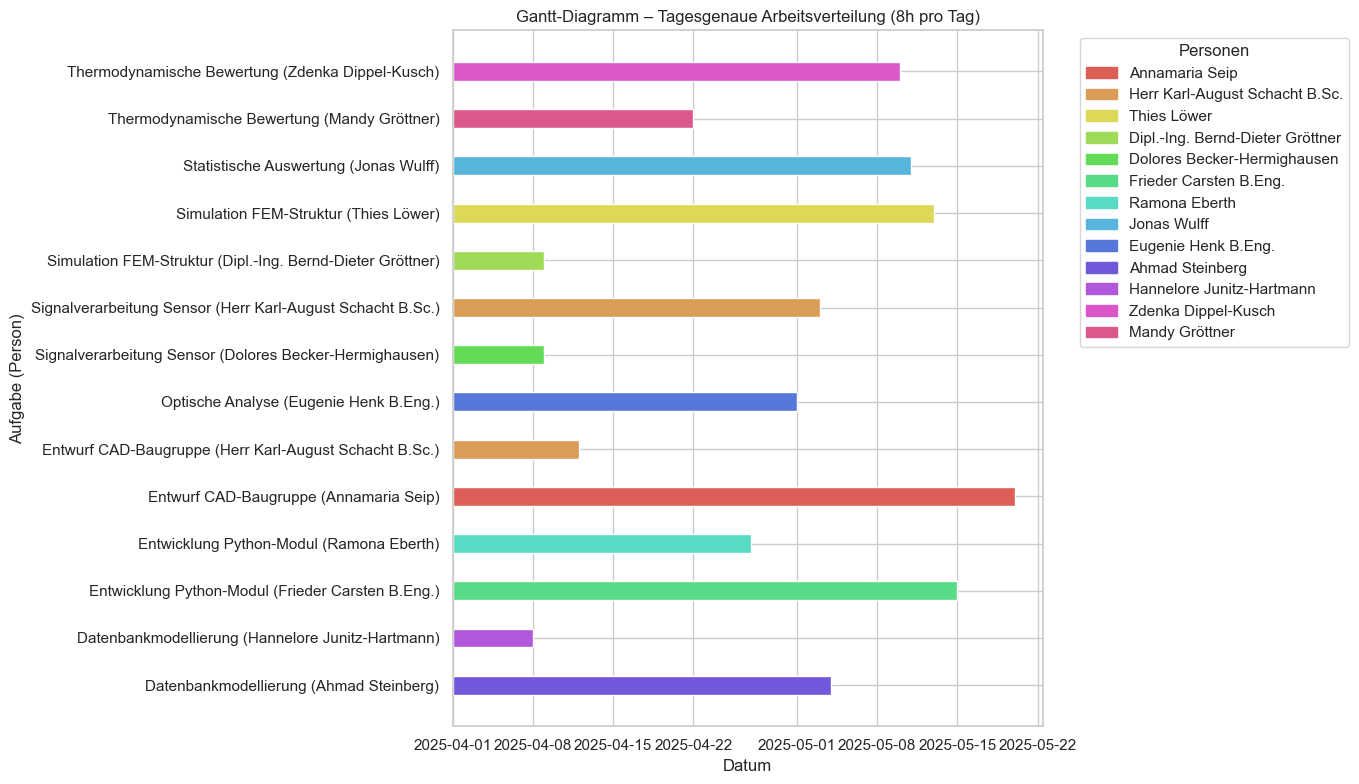

In [26]:
plt.figure(figsize=(14, 8))

# Assign a unique color to each person
personen = df_tagweise['Person'].unique()
farben = sns.color_palette("hls", len(personen))
person_colors = dict(zip(personen, farben))

# Sort tasks by their earliest start date for a logical order
sortierung = df_tagweise.groupby('Aufgabe_Person')['Datum'].min().sort_values().index

for i, aufgabe_person in enumerate(sortierung):
    gruppe = df_tagweise[df_tagweise['Aufgabe_Person'] == aufgabe_person]
    if not gruppe.empty:
        start = gruppe['Datum'].min()
        end = gruppe['Datum'].max() + timedelta(days=1)
        person = gruppe['Person'].iloc[0]
        plt.barh(
            y=aufgabe_person,
            left=start,
            width=(end - start).days,
            height=0.4,
            color=person_colors[person]
        )

# Create legend
handles = [Patch(color=person_colors[p], label=p) for p in personen]
plt.legend(handles=handles, title="Personen", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.xlabel('Datum')
plt.ylabel('Aufgabe (Person)')
plt.title('Gantt-Diagramm – Tagesgenaue Arbeitsverteilung (8h pro Tag)')
plt.tight_layout()
plt.show()

In [27]:
# Zelle 6: Interaktive Plotly-Visualisierung
pio.renderers.default = 'browser'
fig = px.timeline(
    df_tagweise,
    x_start='Datum',
    x_end=df_tagweise['Datum'] + pd.Timedelta(days=1),
    y='Aufgabe_Person',
    color='Person',
    hover_data=['Aufgabe', 'Person']
)
fig.update_yaxes(autorange='reversed')
fig.show()